In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DataSets2-TCH/Remoto Datasets/Remoto athlete_olympic_events-clean.csv',index_col=0)
df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


In [4]:
df.shape

(206165, 14)

<ipython-input-5-15324783d15b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['age'], kde=False, norm_hist=False)


[Text(0.5, 1.0, 'Edades de atletas que participaron en los juegos olimpicos.'),
 Text(0.5, 0, 'edad'),
 Text(0, 0.5, 'conteo')]

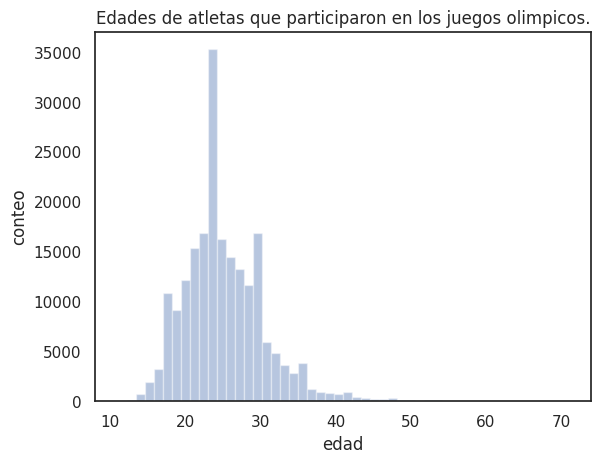

In [5]:
ax = sns.distplot(df['age'], kde=False, norm_hist=False)
ax.set(title='Edades de atletas que participaron en los juegos olimpicos.', xlabel="edad", ylabel="conteo")

In [6]:
by_athlete = df.groupby(level=0)[['age', 'height', 'weight']].mean()
by_sex = df.groupby(level=0)['sex'].last()
merged = by_athlete.merge(by_sex, left_index=True, right_index=True)
males = by_athlete[merged['sex']=='M']
females = by_athlete[merged['sex']=='F']

<ipython-input-7-b2e27e09c72c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(males['height'], hist=False, kde_kws={'shade':True}, label='Hombres')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-7-b2e27e09c72c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function w

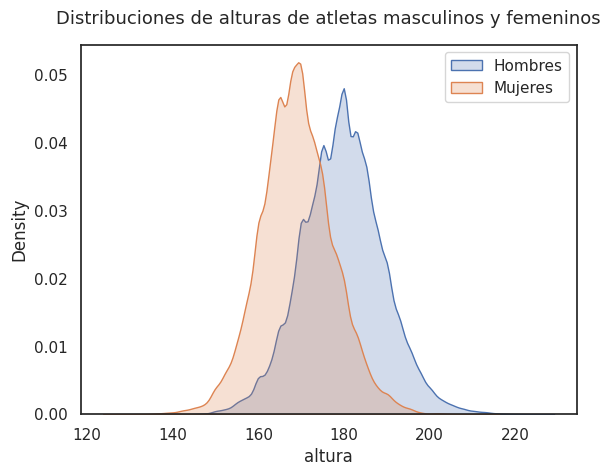

In [7]:
ax = sns.distplot(males['height'], hist=False, kde_kws={'shade':True}, label='Hombres')
sns.distplot(females['height'], hist=False, kde_kws={'shade':True}, ax=ax, label='Mujeres')
ax.set_title('Distribuciones de alturas de atletas masculinos y femeninos', fontsize=13, pad=15)
ax.set(xlabel='altura')
ax.legend(loc='upper right')

<ipython-input-8-896ab8c9fd91>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['age'], kde=False, norm_hist=False)


[Text(0.5, 0, 'edad'), Text(0, 0.5, 'conteo')]

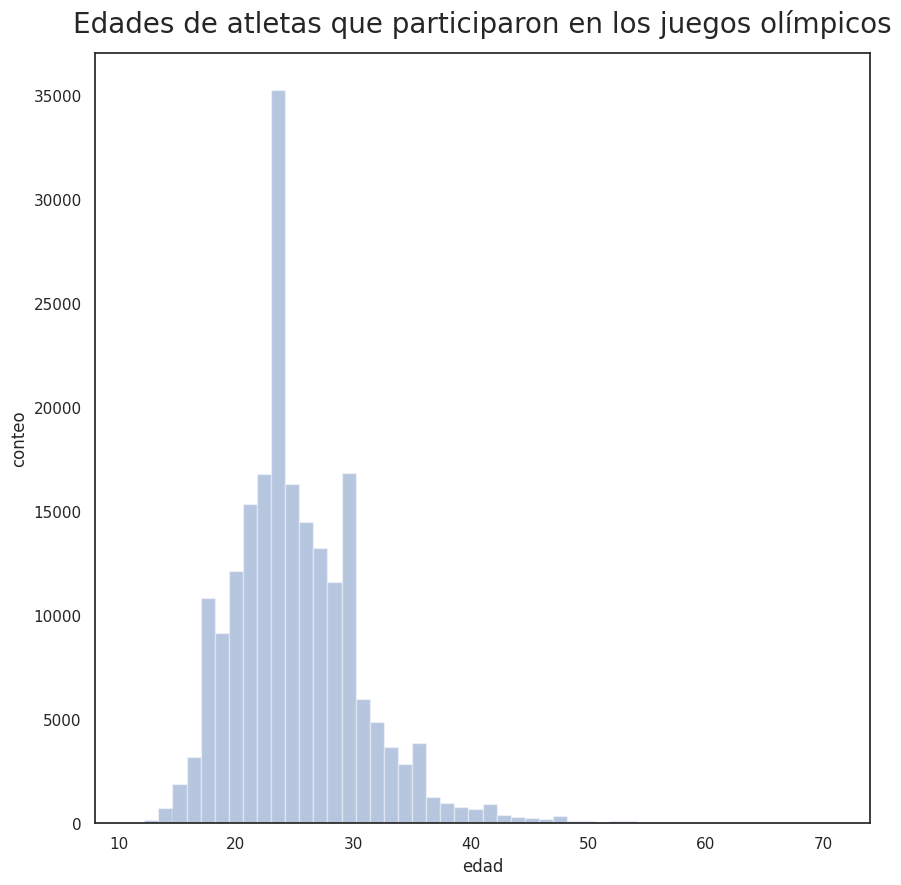

In [8]:
fig = plt.figure(figsize=(10,10))
ax = sns.distplot(df['age'], kde=False, norm_hist=False)
ax.set_title('Edades de atletas que participaron en los juegos olímpicos', fontsize=20, pad=15)
ax.set(xlabel='edad', ylabel='conteo')

# **Ejemplo 2: Gráficas de barras**

In [9]:
df2 = pd.read_json('/content/drive/MyDrive/DataSets2-TCH/Remoto Datasets/Remoto zomato_reviews-clean.json')
df2.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


En este dataset tenemos una variable llamada 'user_rating' que es categórica. Para saber si es categórica podemos primero revisar con el método unique para ver todos los valores únicos contenidos en esa columna:

In [10]:
#obtener datos unicos por columna
df2['user_rating'].unique()

array(['Very Good', 'Excellent', 'Poor', 'Good', 'Average', 'Not rated'],
      dtype=object)

**nunique** nos da el número de categorías que tenemos.

In [11]:
df2['user_rating'].nunique()

6

Ahora, para poder graficar nuestra variable como gráfica de barras necesitamos los conteos de frecuencias de cada categoría (es decir, cuántas veces aparece cada categoría. Para eso pandas nos ofrece un método llamado value_counts:

In [12]:
df2['user_rating'].value_counts()

Very Good    490
Good         346
Excellent    194
Average      119
Not rated     26
Poor           5
Name: user_rating, dtype: int64

In [27]:
counts = df2['user_rating'].value_counts()

[Text(0, 0.5, 'count')]

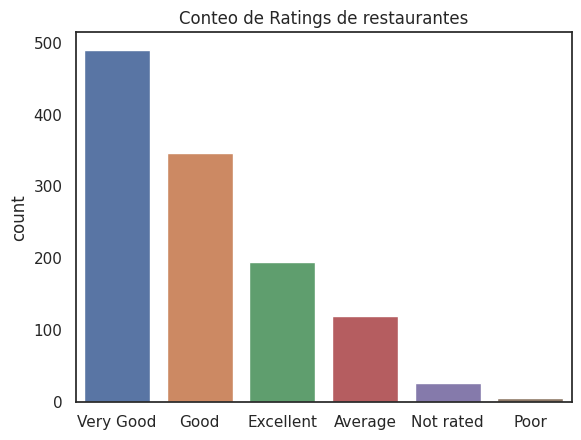

In [30]:
ax = sns.barplot(x=counts.index, y=counts)
ax.set_title('Conteo de Ratings de restaurantes')
ax.set(ylabel='count')

In [14]:
as_percentages = counts * 100/ counts.sum()

[Text(0, 0.5, 'porcentaje del total')]

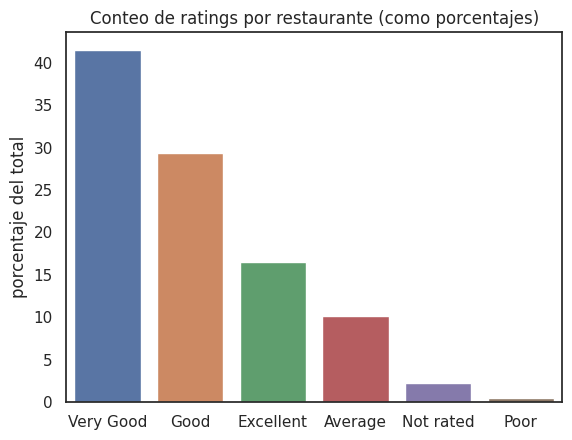

In [17]:
ax = sns.barplot(x=as_percentages.index, y=as_percentages)
ax.set_title('Conteo de ratings por restaurante (como porcentajes)')
ax.set(ylabel='porcentaje del total')

Cambiar la rotacion de las etiquetas de los ejes

[Text(0, 0, 'Very Good'),
 Text(1, 0, 'Good'),
 Text(2, 0, 'Excellent'),
 Text(3, 0, 'Average'),
 Text(4, 0, 'Not rated'),
 Text(5, 0, 'Poor')]

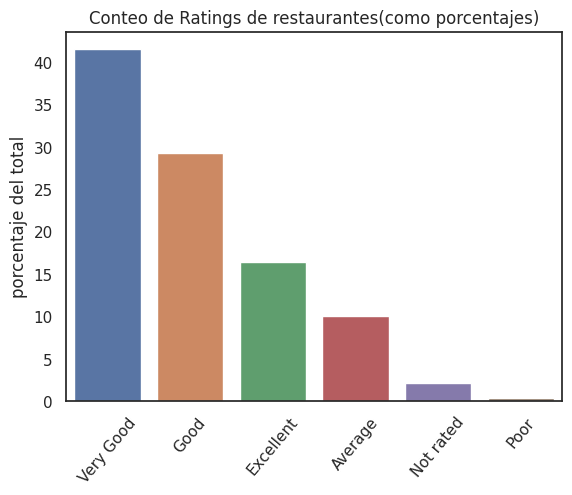

In [19]:
ax = sns.barplot(x=as_percentages.index, y=as_percentages)
ax.set_title('Conteo de Ratings de restaurantes(como porcentajes)')
ax.set(ylabel='porcentaje del total')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

Hay veces que resulta más cómodo y comprensible acomodar nuestras barras de manera horizontal. Esto puede hacerse muy fácilmente agregando la bandera orient='h' y cambiando el orden de nuestros inputs:

[Text(0.5, 0, 'porcentaje total')]

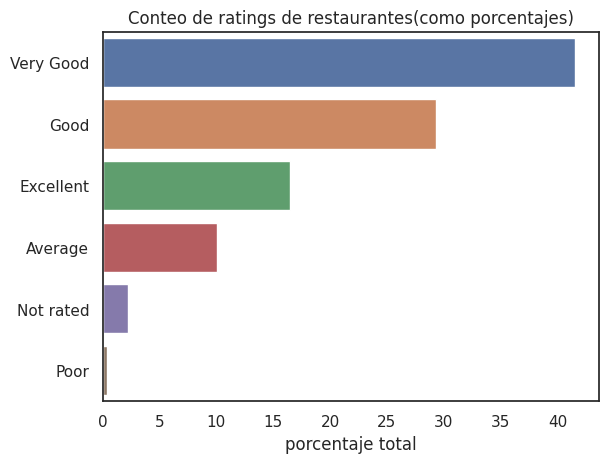

In [21]:
ax = sns.barplot(x=as_percentages, y=as_percentages.index, orient='h')
ax.set_title('Conteo de ratings de restaurantes(como porcentajes)')
ax.set(xlabel='porcentaje total')

### **La Moda**
La moda es el "valor típico" de nuestra variable categórica. Representa la categoría que más veces aparece en nuestro conjunto de datos.

Podemos extraer la moda de la tabla de value_counts o de la gráfica de barras, pero pandas también ofrece un método para obtenerla fácilmente:

In [22]:
df2['user_rating'].mode()

0    Very Good
Name: user_rating, dtype: object

# **Ejemplo 3: Tablas de contingencia**

In [23]:
df3 = pd.read_json('/content/drive/MyDrive/DataSets2-TCH/Remoto Datasets/Remoto zomato_reviews-clean.json')
df3.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


In [24]:
pd.crosstab(df3['price_range'], df3['user_rating'])

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good
price_range,,,,,,
1,12,9,33,1,0,19
2,47,37,116,3,2,132
3,41,84,141,3,1,218
4,19,64,56,19,2,121


Podemos obtener una columna y una fila con los totales añadiendo la bandera margins y margins_name:

In [25]:
pd.crosstab(df3['price_range'], df3['user_rating'], margins=True, margins_name='Total')

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good,Total
price_range,,,,,,,
1,12,9,33,1,0,19,74
2,47,37,116,3,2,132,337
3,41,84,141,3,1,218,488
4,19,64,56,19,2,121,281
Total,119,194,346,26,5,490,1180


In [27]:
pd.crosstab(df3['price_range'], [df3['has_online_delivery'], df3['user_rating']], margins=True, margins_name='Total')

has_online_delivery       0                                               1  \
user_rating         Average Excellent Good Not rated Poor Very Good Average   
price_range                                                                   
1                        12         8   32         1    0        15       0   
2                        47        30  104         3    1        99       0   
3                        40        70  132         3    1       183       1   
4                        19        61   52        19    2       113       0   
Total                   118       169  320        26    4       410       1   

has_online_delivery                               Total  
user_rating         Excellent Good Poor Very Good        
price_range                                              
1                           1    1    0         4    74  
2                           7   12    1        33   337  
3                          14    9    0        35   488  
4                           3    4    0         8   281  
Total                      25   26    1        80  1180

### Múltiples niveles en columnas

In [28]:
crosstab = pd.crosstab(df3['price_range'], [df3['has_online_delivery'], df3['user_rating']])
crosstab

has_online_delivery       0                                               1  \
user_rating         Average Excellent Good Not rated Poor Very Good Average   
price_range                                                                   
1                        12         8   32         1    0        15       0   
2                        47        30  104         3    1        99       0   
3                        40        70  132         3    1       183       1   
4                        19        61   52        19    2       113       0   

has_online_delivery                                
user_rating         Excellent Good Poor Very Good  
price_range                                        
1                           1    1    0         4  
2                           7   12    1        33  
3                          14    9    0        35  
4                           3    4    0         8

In [29]:
crosstab.loc[:, (0)]

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good
price_range,,,,,,
1,12,8,32,1,0,15
2,47,30,104,3,1,99
3,40,70,132,3,1,183
4,19,61,52,19,2,113


In [30]:
crosstab.loc[:, (1, 'Poor')]

price_range
1    0
2    1
3    0
4    0
Name: (1, Poor), dtype: int64

También otra cosa que podríamos hacer es usar el método stack. stack lo que hace es tomar una de nuestras columnas y convertirla en índice. Si le pedimos que haga el stack en el nivel 0, convertirá el nivel 'has_online_delivery' en índice:

In [31]:
crosstab.stack(level=0)

user_rating                      Average  Excellent  Good  Not rated  Poor  \
price_range has_online_delivery                                              
1           0                         12          8    32        1.0     0   
            1                          0          1     1        NaN     0   
2           0                         47         30   104        3.0     1   
            1                          0          7    12        NaN     1   
3           0                         40         70   132        3.0     1   
            1                          1         14     9        NaN     0   
4           0                         19         61    52       19.0     2   
            1                          0          3     4        NaN     0   

user_rating                      Very Good  
price_range has_online_delivery             
1           0                           15  
            1                            4  
2           0                           99  
            1                           33  
3           0                          183  
            1                           35  
4           0                          113  
            1                            8

In [32]:
stack_level_0 = crosstab.stack(level=0)
stack_level_0.loc[(2)]

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good
has_online_delivery,,,,,,
0,47,30,104,3.0,1,99
1,0,7,12,NaN,1,33


In [33]:
stack_level_0.loc[(2,1)]

user_rating
Average       0.0
Excellent     7.0
Good         12.0
Not rated     NaN
Poor          1.0
Very Good    33.0
Name: (2, 1), dtype: float64

In [34]:
crosstab.stack(level=1)

has_online_delivery        0     1
price_range user_rating           
1           Average       12   0.0
            Excellent      8   1.0
            Good          32   1.0
            Not rated      1   NaN
            Poor           0   0.0
            Very Good     15   4.0
2           Average       47   0.0
            Excellent     30   7.0
            Good         104  12.0
            Not rated      3   NaN
            Poor           1   1.0
            Very Good     99  33.0
3           Average       40   1.0
            Excellent     70  14.0
            Good         132   9.0
            Not rated      3   NaN
            Poor           1   0.0
            Very Good    183  35.0
4           Average       19   0.0
            Excellent     61   3.0
            Good          52   4.0
            Not rated     19   NaN
            Poor           2   0.0
            Very Good    113   8.0

# **Ejemplo 4: Graficando con múltiples axis**

In [35]:
df4 = df3
df4.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


In [36]:
crosstab2 = pd.crosstab(df4['price_range'], df4['user_rating'])
crosstab2

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good
price_range,,,,,,
1,12,9,33,1,0,19
2,47,37,116,3,2,132
3,41,84,141,3,1,218
4,19,64,56,19,2,121


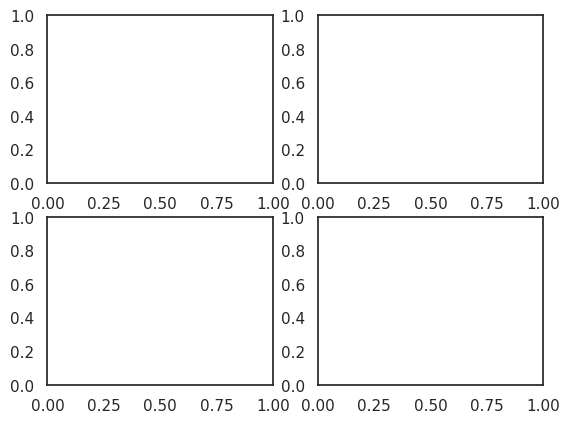

In [37]:
fig, axes = plt.subplots(2, 2)

[Text(0.5, 0, ''), Text(0, 0.5, ''), Text(0.5, 1.0, 'Rango de precio: 4')]

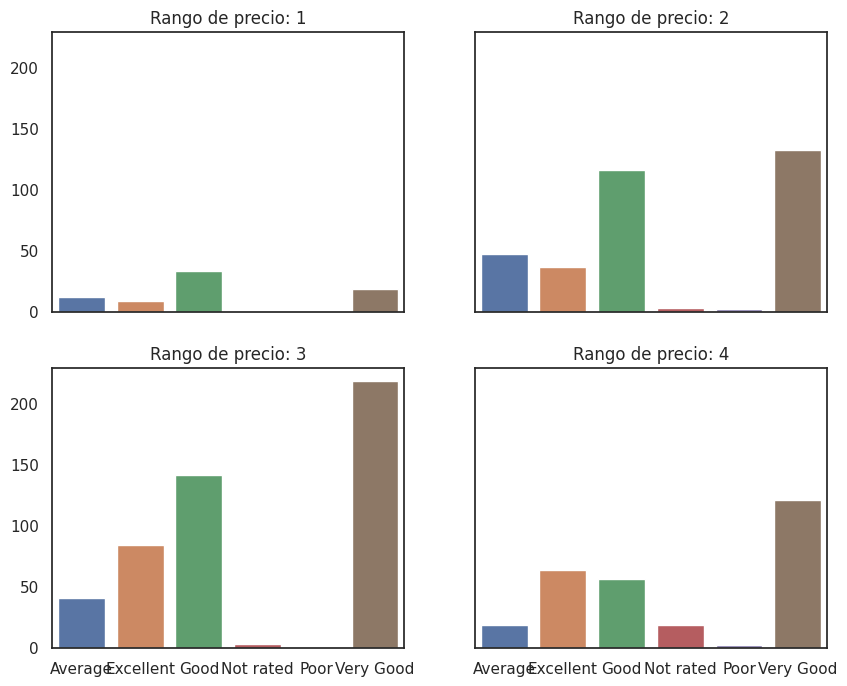

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

sns.barplot(x=crosstab2.columns, y=crosstab2.loc[1], ax=axes[0,0])
sns.barplot(x=crosstab2.columns, y=crosstab2.loc[2], ax=axes[0,1])
sns.barplot(x=crosstab2.columns, y=crosstab2.loc[3], ax=axes[1,0])
sns.barplot(x=crosstab2.columns, y=crosstab2.loc[4], ax=axes[1,1])

axes[0,0].set(xlabel='', ylabel='', title='Rango de precio: 1')
axes[0,1].set(xlabel='', ylabel='', title='Rango de precio: 2')
axes[1,0].set(xlabel='', ylabel='', title='Rango de precio: 3')
axes[1,1].set(xlabel='', ylabel='', title='Rango de precio: 4')

Cosas importantes a notar:


1.   Agregamos las banderas sharex y sharey porque tenemos el mismo eje x para todas nuestras gráficas y porque queremos comparar las gráficas una contra otra. Si nuestro eje y no fuera igual para todas, sería más difícil comparar usando sólo la vista.
2.   La variable axes contiene un arreglo de dos dimensiones con cada uno de nuestros ax (el contenedor de cada gráfica). Así como accedemos a cualquier arreglo de 2 dimensiones, acceder a un ax se lleva a cabo de esta manera: axes[0, 1].
3.   Eliminamos los xlabels y los ylabels porque no son muy informativos y generan ruido visual. En cambio, cada gráfica necesita un título para saber a qué categoría del primer nivel pertenece.
Agregamos un título a la figure (en lugar de al ax) usando el método suptitle.

# **Ejemplo 5: Boxplots y Violinplots**

In [41]:
df5 = pd.read_csv('/content/drive/MyDrive/DataSets2-TCH/Remoto Datasets/Remoto athlete_olympic_events-clean.csv', index_col=0)
df5.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


In [58]:
by_athlete2 = df5.groupby(level=0)[['age', 'height', 'weight']].mean()
sex = df.groupby(level=0)['sex'].last()
mergedd = by_athlete2.merge(sex, left_index=True, right_index=True)

In [59]:
mergedd

,age,height,weight,sex
athlete_id,,,,
1,24.000000,180.0,80.0,M
2,23.000000,170.0,60.0,M
5,24.333333,185.0,82.0,F
6,32.000000,188.0,75.0,M
7,32.000000,183.0,72.0,M
...,...,...,...,...
135567,26.000000,183.0,72.0,M
135568,33.000000,171.0,69.0,F
135569,29.000000,179.0,89.0,M


<Axes: xlabel='weight'>

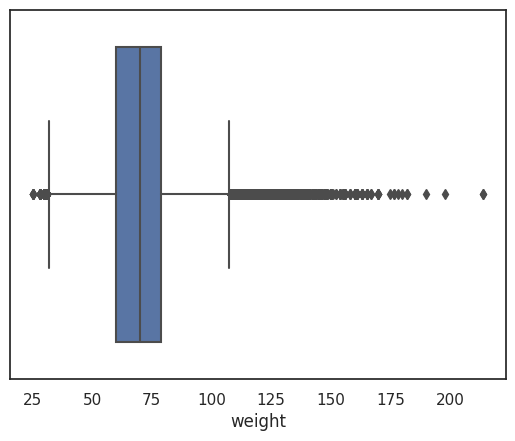

In [63]:
sns.boxplot(x=df5['weight'])

<Axes: xlabel='sex', ylabel='weight'>

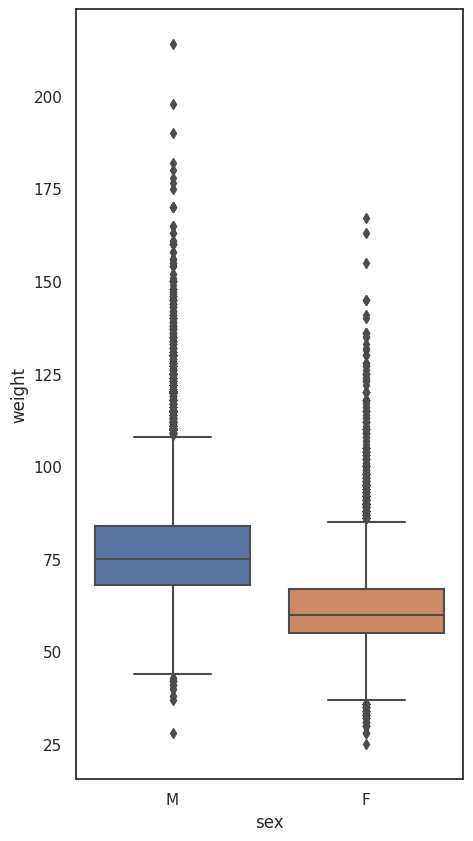

In [64]:
plt.figure(figsize=(5,10))
sns.boxplot(data=merged, x='sex', y='weight')

<Axes: xlabel='sex', ylabel='weight'>

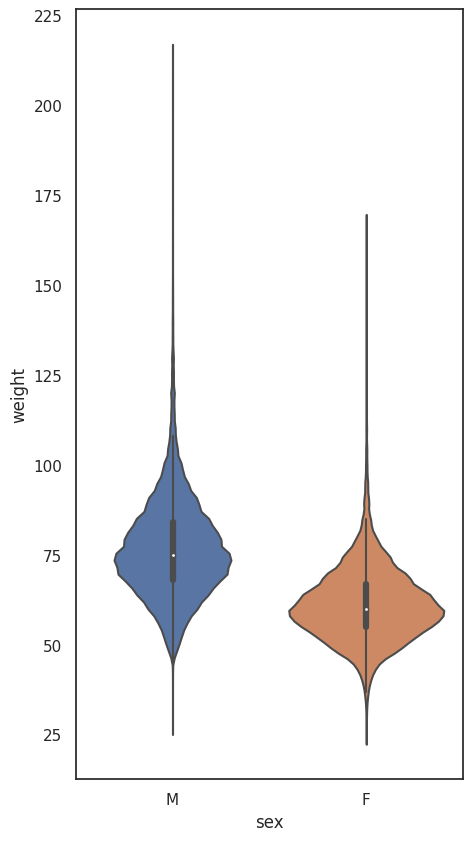

In [65]:
plt.figure(figsize=(5,10))
sns.violinplot(data=merged, x='sex', y='weight')

La 'pildorita' negra en medio del violinplot representa el Rango Intercuartílico y el punto blanco la mediana. Así puedes comparar más fácilmente lo que estamos viendo en esta gráfica con la gráfica anterior.